### 10년치 데이터 가져오기

In [1]:
import FinanceDataReader as fdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = fdr.DataReader('GOOG', start='2012-10-31', end='2022-10-31')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-31 to 2022-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [3]:
df.loc[df['Volume'] == 0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


#### 시계열 데이터, 이동평균, 이동표준편차 시각화

In [4]:
def plot_rolling(data, interval):
	rolmean = data.rolling(interval).mean()
	rolstd = data.rolling(interval).std()

	plt.figure(figsize=(10, 6))
	plt.xlabel('Date')
	plt.plot(data, color='blue', label='Original')
	plt.plot(rolmean, color='red', label=f'Rolling mean {interval}')
	plt.plot(rolstd, color='black', label=f'Rolling std {interval}')
	plt.legend(loc='best')
	plt.title('Rolling Mean & Std')
	plt.show()

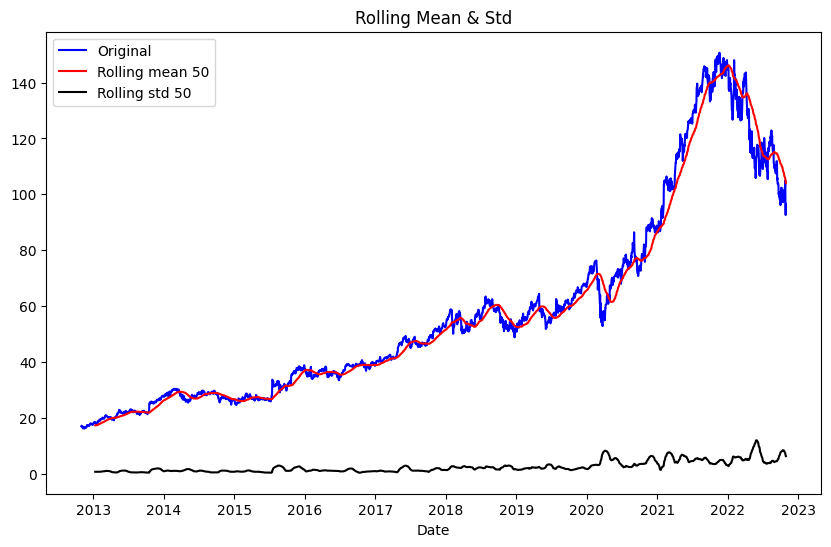

In [5]:
plot_rolling(df['Adj Close'], 50)

#### 정상성 데이터 확인 - ADF 테스트

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Adj Close'].values)

In [7]:
result

(-0.7728513690427873,
 0.8269670022786417,
 24,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8123.380743513813)

In [8]:
print(f'p-value : {result[1]}')

p-value : 0.8269670022786417


#### 차분한 결과의 ADF 테스트

In [9]:
df_diff1 = df['Adj Close'].diff(1).dropna()

<Axes: xlabel='Date'>

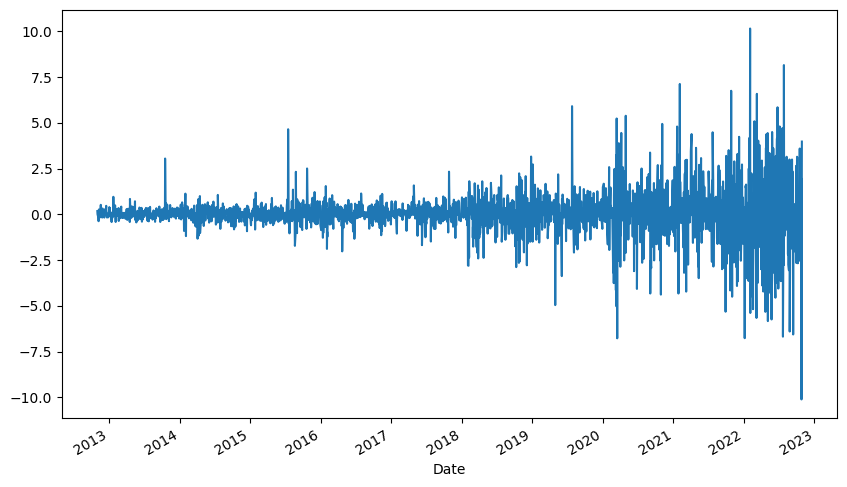

In [10]:
df_diff1.plot(figsize=[10, 6])

In [11]:
result = adfuller(df_diff1)
result

(-10.59271583138347,
 6.46579568394621e-19,
 23,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8119.718254723483)

#### ACF / PACF 를 통한 AR / MA 확인

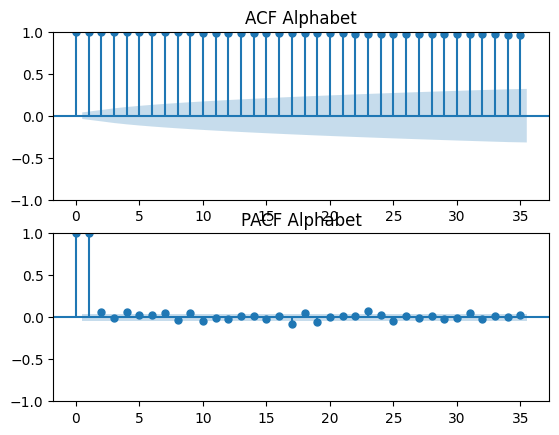

In [12]:
import statsmodels.graphics.tsaplots as sgt 
## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


sgt.plot_acf(df['Adj Close'], ax=ax1)
ax1.set_title("ACF Alphabet")


sgt.plot_pacf(df['Adj Close'], method = ('ols'), ax=ax2)
ax2.set_title("PACF Alphabet")

plt.show()

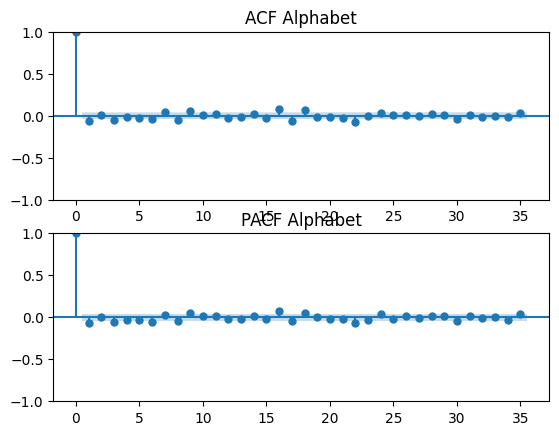

In [13]:
import statsmodels.graphics.tsaplots as sgt 
## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


sgt.plot_acf(df_diff1, ax=ax1)
ax1.set_title("ACF Alphabet")


sgt.plot_pacf(df_diff1, method = ('ols'), ax=ax2)
ax2.set_title("PACF Alphabet")

plt.show()

#### pmdarima 활용

In [14]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [15]:
n_diffs = ndiffs(df['Adj Close'])
n_diffs

1

##### pmdarima.arima.auto_arima
> pmdarima.arima.auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)

In [16]:
model = pm.auto_arima(y=df['Adj Close'],
							d = 1,
							start_p = 0, max_p = 3,
							start_q = 0, max_q = 3,
							seasonal=False,
							trace = True
							)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8231.556, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8221.824, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8221.860, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8231.192, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8223.799, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8223.097, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8225.820, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8221.686, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8223.648, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8222.890, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8221.739, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8224.664, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.038 seconds


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2517
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -4108.843
Date:                Thu, 05 Oct 2023   AIC                           8221.686
Time:                        09:57:46   BIC                           8233.347
Sample:                             0   HQIC                          8225.918
                               - 2517                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0677      0.011     -6.070      0.000      -0.090      -0.046
sigma2         1.5346      0.018     87.291      0.000       1.500       1.569
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10915.24
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              20.60   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

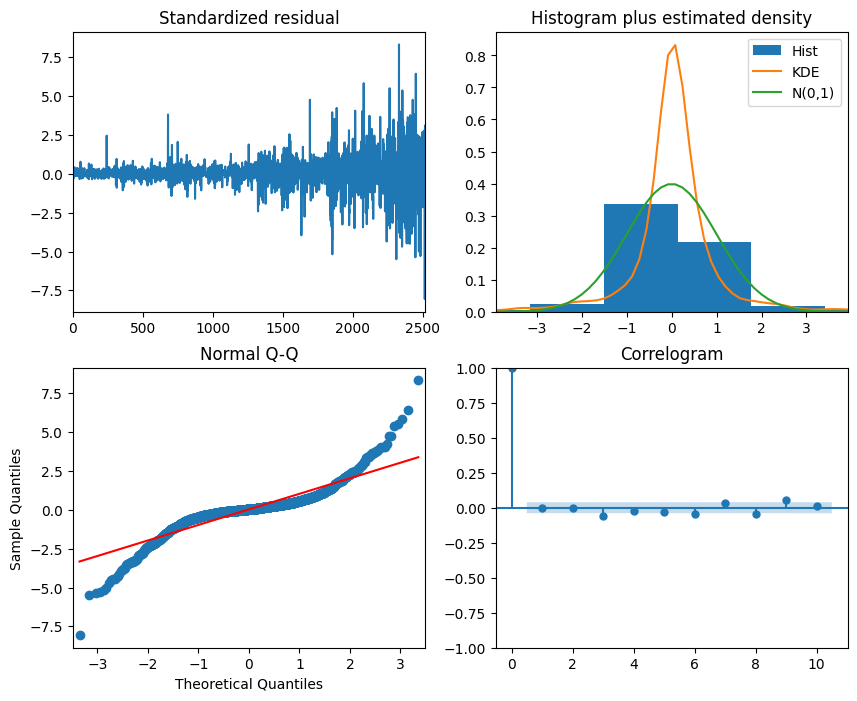

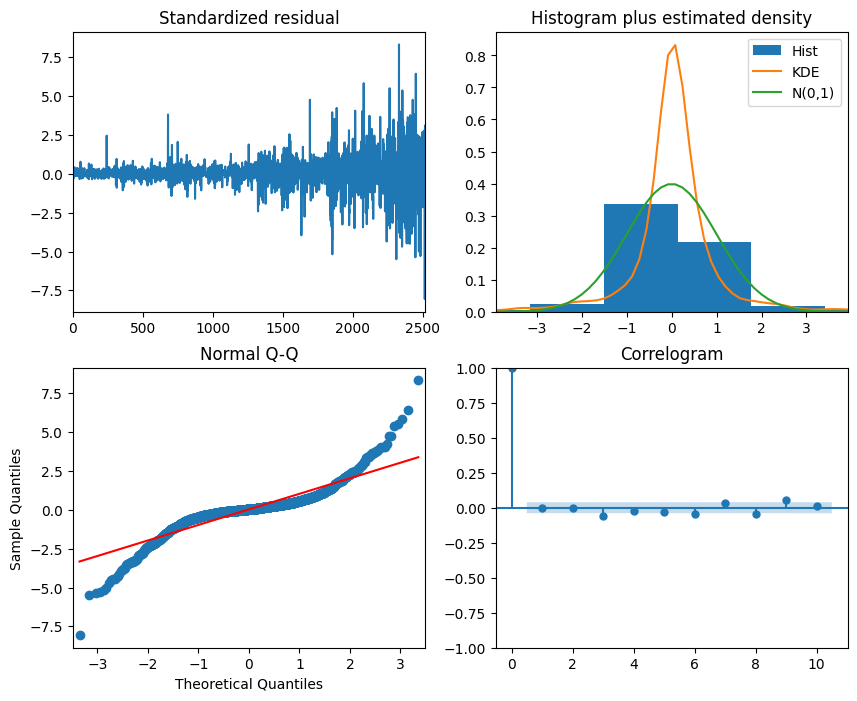

In [18]:
model.plot_diagnostics(figsize=[10, 8])

#### ARIMA 모델 학습과 테스트

In [19]:
# train, test set 분리
train_data, test_data = df['Adj Close'][:int(len(df['Adj Close'])* 0.9)], df['Adj Close'][int(len(df['Adj Close'])* 0.9):]

In [20]:
# train_data 학습
model = pm.auto_arima(y=train_data,
							d = 1,
							start_p = 0, max_p = 3,
							start_q = 0, max_q = 3,
							seasonal=False,
							trace = True
							)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6127.619, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6119.112, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6119.471, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6134.024, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6120.306, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6118.765, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6120.764, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6120.763, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6120.804, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6120.503, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6126.014, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.684 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3055.382
Date:                Thu, 05 Oct 2023   AIC                           6118.765
Time:                        09:57:48   BIC                           6141.664
Sample:                             0   HQIC                          6127.120
                               - 2265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0851      0.028      3.000      0.003       0.030       0.141
ar.L1         -0.4906      0.106     -4.650      0.000      -0.697      -0.284
ma.L1          0.4247      0.108      3.915      0.000       0.212       0.637
sigma2         0.8704      0.011     82.185      0.000       0.850       0.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9707.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.78   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train_data.tail()

Date
2021-10-22    138.625000
2021-10-25    138.772995
2021-10-26    139.671997
2021-10-27    146.427505
2021-10-28    146.128998
Name: Adj Close, dtype: float64

In [22]:
pred = model.predict(len(test_data))
pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2265    146.397378
2266    146.350840
2267    146.458810
2268    146.490975
2269    146.560331
           ...    
2512    160.435275
2513    160.492390
2514    160.549505
2515    160.606620
2516    160.663736
Length: 252, dtype: float64

In [23]:
pred_ = pd.Series(list(pred), index=test_data.index)
pred_

Date
2021-10-29    146.397378
2021-11-01    146.350840
2021-11-02    146.458810
2021-11-03    146.490975
2021-11-04    146.560331
                 ...    
2022-10-24    160.435275
2022-10-25    160.492390
2022-10-26    160.549505
2022-10-27    160.606620
2022-10-28    160.663736
Length: 252, dtype: float64

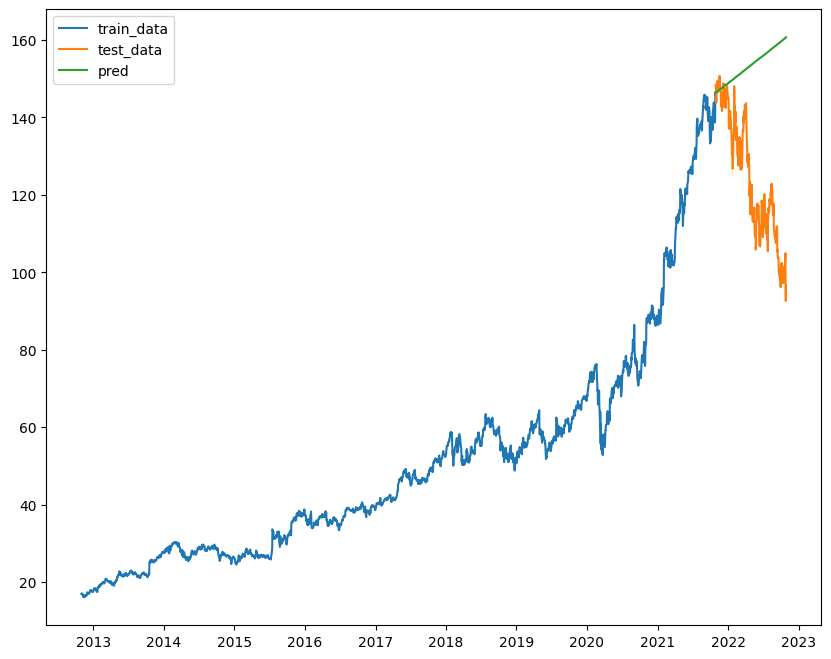

In [27]:
# train_data, test_data, pred plot
plt.figure(figsize=(10, 8))
plt.plot(train_data, label='train_data')
plt.plot(test_data, label='test_data')
plt.plot(pred_, label='pred')
plt.legend(loc='best')
plt.show()

In [29]:
# forcast 함수
def forecast_n_step(model, n=1):
	fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
	return (fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n])

def forecast(length, model, index, data=None):
	y_pred = []
	pred_upper = []
	pred_lower = []

	if data is not None:
		for new_ob in data:
			fc, conf = forecast_n_step(model)
			y_pred.append(fc[0])
			pred_upper.append(conf[0][1])
			pred_lower.append(conf[0][0])
			model.update(new_ob)
	else:
		for i in range(length):
			fc, conf = forecast_n_step(model)
			y_pred.append(fc[0])
			pred_upper.append(conf[0][1])
			pred_lower.append(conf[0][0])
			model.update(fc[0])
	return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [30]:
# 예측
fc, upper, lower = forecast(len(test_data), model, index=test_data.index, data=test_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
fc, upper, lower

(Date
 2021-10-29    146.397378
 2021-11-01    148.094496
 2021-11-02    144.272178
 2021-11-03    145.570825
 2021-11-04    146.931518
                  ...    
 2022-10-24    101.463543
 2022-10-25    102.928126
 2022-10-26    104.869707
 2022-10-27     95.600410
 2022-10-28     92.477792
 Length: 252, dtype: float64,
 [148.22594194961792,
  149.92435364556925,
  146.10970631600486,
  147.41015110971398,
  148.77158162302254,
  150.40280407745274,
  151.18076988516336,
  151.22484225395775,
  151.16755056696817,
  148.710822244852,
  148.55463896474234,
  151.38929569156684,
  151.3901076277049,
  150.95720288447475,
  150.97936457137556,
  152.49138159459721,
  151.97207748777933,
  149.13516931324244,
  148.6162166952437,
  148.65039670878664,
  144.97761289174724,
  147.65748343227014,
  144.85334173462792,
  143.38422858959055,
  145.6073031993047,
  144.58139436759066,
  145.5559879983831,
  149.72954208835574,
  150.71039271297477,
  150.05876758776083,
  150.5589314838271,
  1

In [34]:
upper_series = pd.Series(upper, index=test_data.index)
lower_series = pd.Series(lower, index=test_data.index)

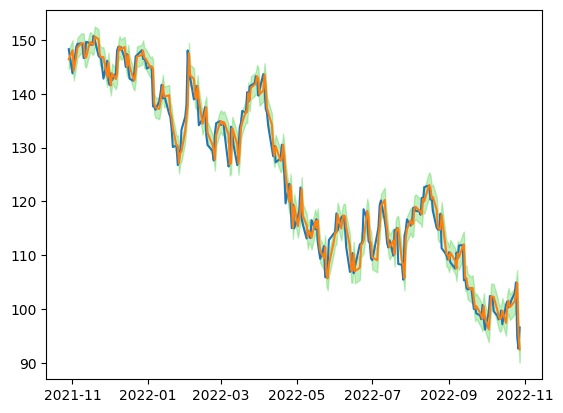

In [44]:
plt.plot(test_data)
plt.fill_between(lower_series.index, lower_series, upper_series, color='limegreen', alpha=0.3)
plt.plot(fc)

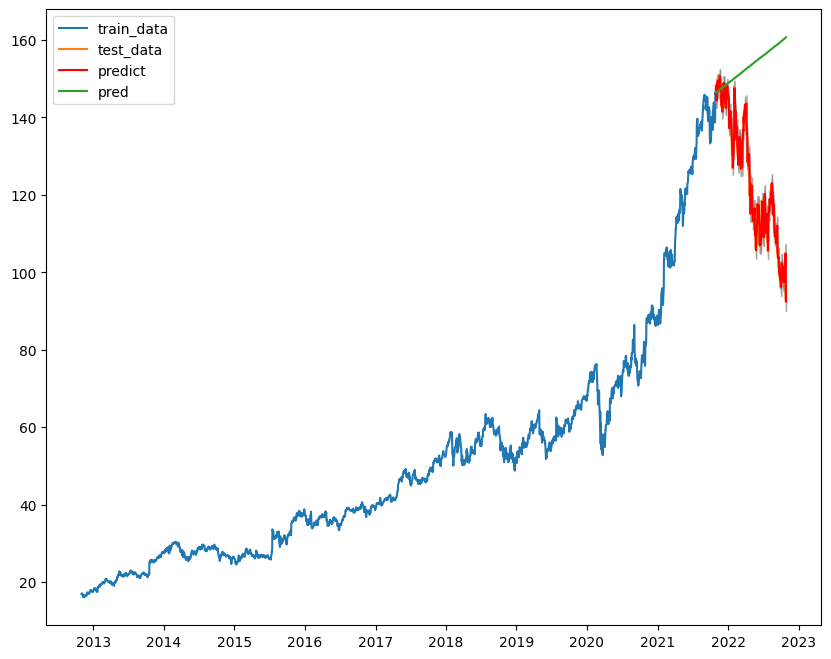

In [43]:
# train_data, test_data, pred plot
plt.figure(figsize=(10, 8))
plt.plot(train_data, label='train_data')
plt.plot(test_data, label='test_data')
plt.plot(fc, 'r', label='predict')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.3)
plt.plot(pred_, label='pred')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))

MSE:  4.440750562025714e+128
MAE:  4.208731937927018e+63
RMSE:  2.1073088435314162e+64
MAPE:  11708.26%


In [46]:
import statsmodels.api as sm
model_ = sm.tsa.arima.Arima(train_data, order=(1, 1, 1))
model_fit = model_.fit()
model_fit.forecast(len(test_data))